In [1]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!

In [2]:
from util.functions import area_latlon
from util.functions import create_masks
from util.functions import split_masks
from util.gamap_colormap import WhGrYlRd

# Create xarray region mask

In [3]:
# Import regionmask and check the version
#import regionmask
#regionmask.__version__

In [4]:
# load data
fname = '/home/msadiq/Desktop/co2/data/emission/ODIAC/odiac2019_1x1d_2015.nc'
ds = xr.open_dataset(fname)
#ds

In [5]:
# read in one month of data, [180,360], to create corresponding mask
dr = ds['intl_bunker'][1,:,:]
#dr
mask = create_masks(input_file=dr, 
                    input_file_type='dataarray', 
                    var_name='', 
                    mask_type='giorgi', 
                    output_format='xarray', 
                    output_path='.', 
                    figure_flag = False, 
                    figure_path='.')

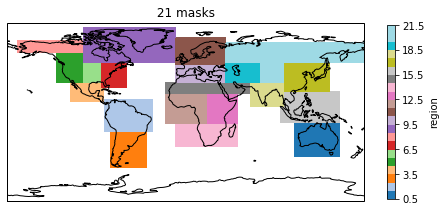

In [6]:
# global map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

low = mask.min()
high = mask.max()
levels = np.arange(low - 0.5, high + 1)

mask.plot(ax=ax, transform=ccrs.PlateCarree(), levels=levels, cmap='tab20', vmax = 21.5, cbar_kwargs={'shrink': 0.8,})
ax.set_title(' ' + str(int(high.values)) + " masks ")
ax.coastlines();

### Split it into separate mask files and save

In [7]:
# copy attributes from an existing GEOS-Chem mask file
fname = '/home/msadiq/Desktop/co2/data/emission/GC/SE_Asia_mask.generic.1x1.nc'
ds = xr.open_dataset(fname)
ds.MASK.attrs['long_name']
len(ds.lon)
mask

<xarray.DataArray 'region' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

MASK1_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK1_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK2_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK2_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK3_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK3_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK4_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK4_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK5_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK5_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK6_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK6_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK7_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK7_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK8_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK8_1.0x1.0.nc figure is saved to: ./figures/giorgi
MASK9_1.0x1.0.nc NetCDf file is saved to: ./MASKS/giorgi
MASK9_1.0x1.0.nc figure is saved to: ./figures/giorgi
M

/home/msadiq/Desktop/co2/geoschem_simulations/TagCO2/py_code/util/functions.py:156: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=[8, 4])


MASK21_1.0x1.0.nc figure is saved to: ./figures/giorgi


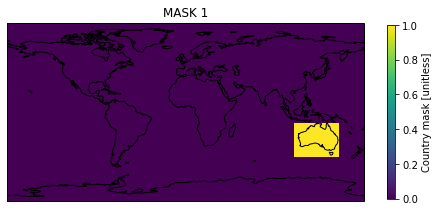

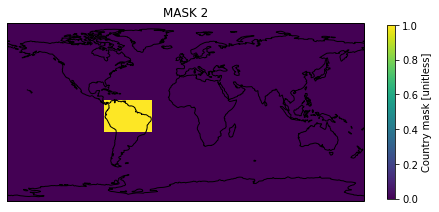

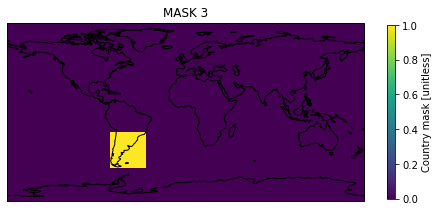

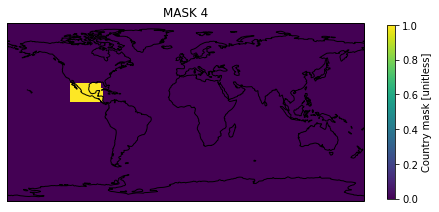

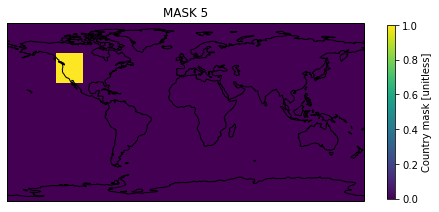

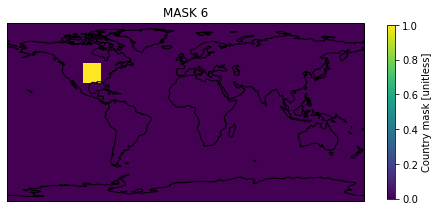

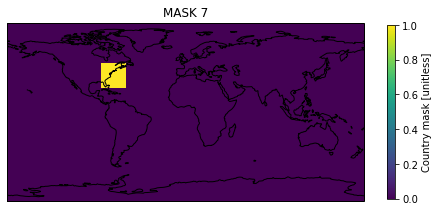

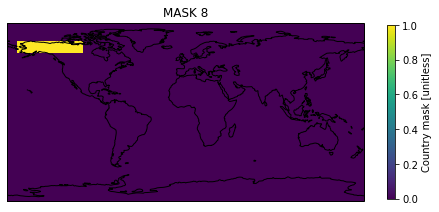

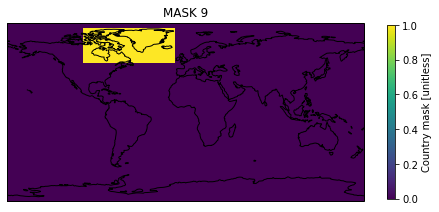

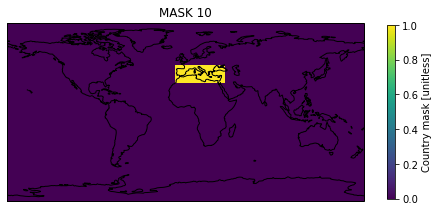

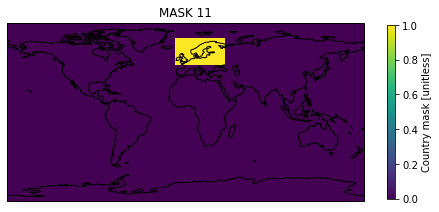

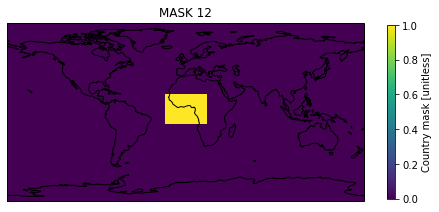

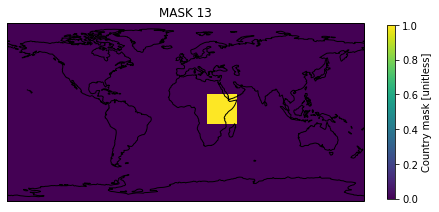

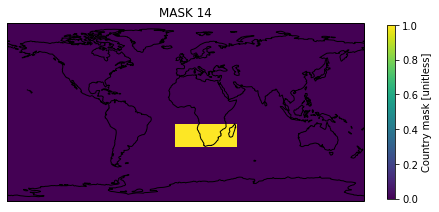

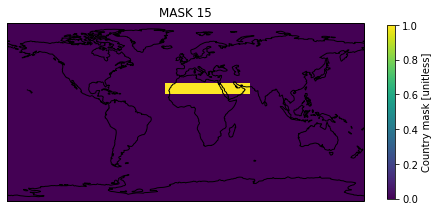

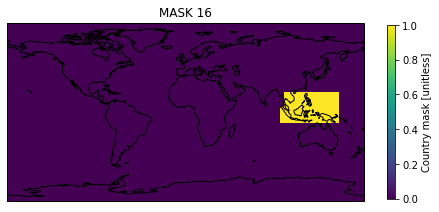

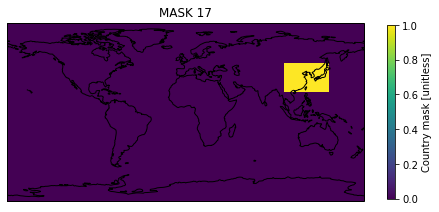

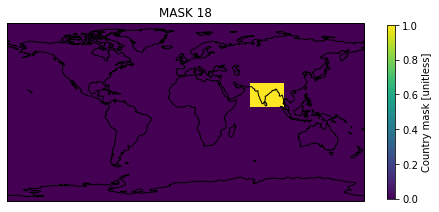

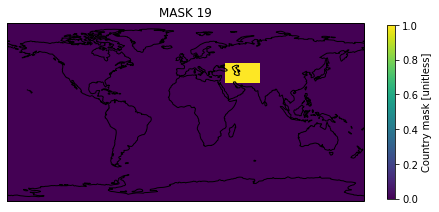

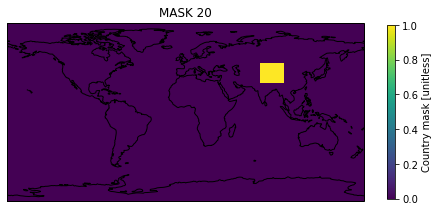

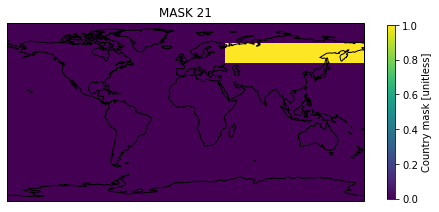

In [8]:
split_masks(input_file = mask, 
            input_file_type='dataarray',
            output_format='netcdf', 
            output_path='./MASKS/giorgi', 
            figure_flag = True, 
            figure_path='./figures/giorgi')

In [11]:
# one more mask, for the rest of the globe
target = xr.Dataset({"MASK": (("time", "lat", "lon"), np.zeros(180*360).reshape(1,180,360))},coords=ds.coords)
target = target.astype(dtype='float32')
mask_nan = np.isnan(mask)
target['MASK'][0,:,:] = mask_nan.where(True)
target['MASK'].attrs = ds['MASK'].attrs
target['lon'].attrs = ds['lon'].attrs
target['lat'].attrs = ds['lat'].attrs
#print(target)
target.attrs = ds.attrs
target.attrs['comment'] = 'giorgi region masks, by m.sadiq 2020'
target.to_netcdf('/home/msadiq/Desktop/co2/data/emission/GC/MASK22_giorgi_1x1.nc')

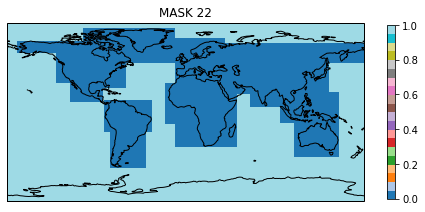

In [12]:
# plot the last mask
fig = plt.figure(figsize=[8, 4])

proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

target['MASK'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='tab20', cbar_kwargs={'shrink': 0.8, 'label': ''})
ax.set_title("MASK 22")
ax.coastlines();